In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset and retreiving the independent and dependent variables
social_network = pd.read_csv("PS.csv")
#print(social_network)

X = social_network.iloc[:,0:7].values
y = social_network.iloc[:,7].values

In [3]:
social_network.head(n=10)
#print(len(X))
#print(X)

,step,type_num,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,1,4,9839.64,170136.00,160296.36,0.0,0.00,0,0,PAYMENT,C1231006815,M1979787155
1,1,4,1864.28,21249.00,19384.72,0.0,0.00,0,0,PAYMENT,C1666544295,M2044282225
2,1,5,181.00,181.00,0.00,0.0,0.00,1,0,TRANSFER,C1305486145,C553264065
3,1,2,181.00,181.00,0.00,21182.0,0.00,1,0,CASH_OUT,C840083671,C38997010
4,1,4,11668.14,41554.00,29885.86,0.0,0.00,0,0,PAYMENT,C2048537720,M1230701703
5,1,4,7817.71,53860.00,46042.29,0.0,0.00,0,0,PAYMENT,C90045638,M573487274
6,1,4,7107.77,183195.00,176087.23,0.0,0.00,0,0,PAYMENT,C154988899,M408069119
7,1,4,7861.64,176087.23,168225.59,0.0,0.00,0,0,PAYMENT,C1912850431,M633326333
8,1,4,4024.36,2671.00,0.00,0.0,0.00,0,0,PAYMENT,C1265012928,M1176932104
9,1,3,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,DEBIT,C712410124,C195600860


In [4]:
social_network.iloc[:,0:8].head(n=10)

,step,type_num,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,4,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,4,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,5,181.00,181.00,0.00,0.0,0.00,1
3,1,2,181.00,181.00,0.00,21182.0,0.00,1
4,1,4,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,4,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,4,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,4,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,4,4024.36,2671.00,0.00,0.0,0.00,0
9,1,3,5337.77,41720.00,36382.23,41898.0,40348.79,0


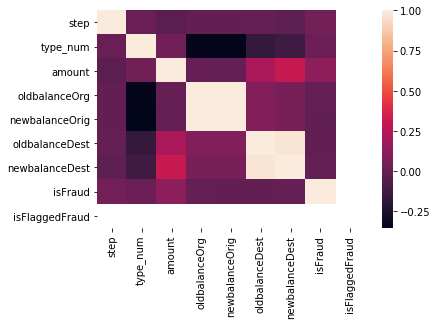

In [5]:
#Visualizing by correlation map
sns.heatmap(social_network.corr())

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
#print(X_train)
#print(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
cfr = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
cfr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
y_pred = cfr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [11]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
#                      np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
# plt.contourf(X1,X2, logR.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(("red","green")))
# plt.xlim(X1.min(),X1.max())
# plt.ylim(X2.min(),X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set ==j, 1],
#                 c = ListedColormap(("red","green"))(i), label = j)
    
# plt.title('Logistic Regression (Training Set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [12]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_test, y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
#                      np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
# plt.contourf(X1,X2, logR.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(("red","green")))
# plt.xlim(X1.min(),X1.max())
# plt.ylim(X2.min(),X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set ==j, 1],
#                 c = ListedColormap(("red","green"))(i), label = j)
    
# plt.title('Logistic Regression (Test Set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [13]:
#Evaluate the model by using confusiion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[261862,      3],
       [   123,    156]], dtype=int64)

In [14]:
accuracy = (cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))
print(accuracy)

0.9995193481445312


In [15]:
error = (cm[0][1]+cm[1][0])/(sum(cm[0])+sum(cm[1]))
print(error)

0.00048065185546875


In [16]:
# y_test.shape[0]

In [17]:
# v = np.arange(1,y_test.shape[0]+1)
# v

In [18]:
# plt.scatter(v, y_test, color = "blue")
# plt.scatter(v,y_pred,color = "red")